# QSVM multiclass classification

A [multiclass extension](https://qiskit.org/documentation/apidoc/qiskit.aqua.components.multiclass_extensions.html) works in conjunction with an underlying binary (two class) classifier to provide classification where the number of classes is greater than two.

Currently the following multiclass extensions are supported:

* OneAgainstRest
* AllPairs
* ErrorCorrectingCode

These use different techniques to group the data from the binary classification to achieve the final multiclass classification.

In [1]:
import numpy as np

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.algorithms import QSVM
from qiskit_machine_learning.multiclass_extensions import AllPairs
from qiskit_machine_learning.utils.dataset_helper import get_feature_dimension

We want a dataset with more than two classes, so here we choose the `Wine` dataset that has 3 classes.

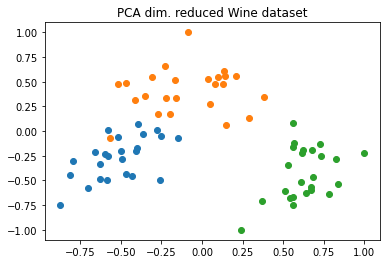

In [2]:
from qiskit_machine_learning.datasets import wine

n = 2  # dimension of each data point
sample_Total, training_input, test_input, class_labels = wine(training_size=24,
                                                              test_size=6, n=n, plot_data=True)
temp = [test_input[k] for k in test_input]
total_array = np.concatenate(temp)

To used a multiclass extension an instance thereof simply needs to be supplied, on the QSVM creation, using the `multiclass_extension` parameter. Although `AllPairs()` is used in the example below, the following multiclass extensions would also work:

    OneAgainstRest()
    ErrorCorrectingCode(code_size=5)

In [3]:
algorithm_globals.random_seed = 10598

backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dimension=get_feature_dimension(training_input),
                           reps=2, entanglement='linear')
svm = QSVM(feature_map, training_input, test_input, total_array,
           multiclass_extension=AllPairs())
quantum_instance = QuantumInstance(backend, shots=1024,
                                   seed_simulator=algorithm_globals.random_seed,
                                   seed_transpiler=algorithm_globals.random_seed)

result = svm.run(quantum_instance)
for k,v in result.items():
    print(f'{k} : {v}')

testing_accuracy : 1.0
test_success_ratio : 1.0
predicted_labels : [0 1 2 2 2 2]
predicted_classes : ['A', 'B', 'C', 'C', 'C', 'C']


In [4]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright